In [88]:
import os
#
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
#
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [89]:
import librosa

In [90]:
from python_speech_features import mfcc

In [91]:
df = pd.read_csv('freesound-audio-tagging/train.csv')
df.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [92]:
df = df[df['label'].isin(['Saxophone', 'Cello', 'Clarinet', 'Double_bass', 'Acoustic_guitar'])]

In [93]:
df['label'].unique()

array(['Saxophone', 'Cello', 'Clarinet', 'Double_bass', 'Acoustic_guitar'],
      dtype=object)

In [94]:
path = 'freesound-audio-tagging/audio_train/'
audio_data = list()
for i in tqdm(range(df.shape[0])):
    audio_data.append(librosa.load(path+df['fname'].iloc[i]))
audio_data = np.array(audio_data)

100%|██████████| 1500/1500 [07:55<00:00,  3.15it/s]
<ipython-input-94-e7f1e43330e1>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  audio_data = np.array(audio_data)


In [97]:
audio_data[:,0]

array([array([-7.3037209e-04, -1.0996412e-03, -1.0551845e-03, ...,
       -7.7292389e-05, -3.8508577e-05, -2.1228403e-05], dtype=float32),
       array([-3.8226531e-03, -5.3708917e-03, -4.4372473e-03, ...,
       -9.3773224e-06,  1.2247583e-05, -3.6367885e-05], dtype=float32),
       array([ 3.1921505e-03,  4.8865937e-03,  4.5134020e-03, ...,
       -5.1403777e-06, -1.0212838e-05,  3.3166596e-06], dtype=float32),
       ...,
       array([-0.00020287, -0.00029277, -0.00026614, ..., -0.00043031,
       -0.00041986, -0.00042796], dtype=float32),
       array([-1.0038918e-03, -1.9779417e-03, -1.2904897e-03, ...,
       -2.4016663e-05, -4.9717244e-05, -2.0976680e-05], dtype=float32),
       array([-2.8853930e-04, -4.8403820e-04, -4.1960695e-04, ...,
       -1.2897507e-05, -2.5677711e-05, -1.6655575e-05], dtype=float32)],
      dtype=object)

In [98]:
audio_data[:,1]

array([22050, 22050, 22050, ..., 22050, 22050, 22050], dtype=object)

In [99]:
df['audio_waves'] = audio_data[:,0]
df['samplerate'] = audio_data[:,1]
df.head()

,fname,label,manually_verified,audio_waves,samplerate
1,001ca53d.wav,Saxophone,1,"[-0.0007303721, -0.0010996412, -0.0010551845, ...",22050
4,00353774.wav,Cello,1,"[-0.003822653, -0.0053708917, -0.0044372473, -...",22050
5,003b91e8.wav,Cello,0,"[0.0031921505, 0.0048865937, 0.004513402, 0.00...",22050
8,004ad66f.wav,Clarinet,0,"[-0.00018609133, -0.00029739283, -0.0003075322...",22050
14,0091fc7f.wav,Cello,1,"[0.00042805163, 0.0005860274, 0.00045838652, 0...",22050


In [100]:
bit_lengths = list()
for i in range(df.shape[0]):
    bit_lengths.append(len(df['audio_waves'].iloc[i]))
bit_lengths = np.array(bit_lengths)
df['bit_lengths'] = bit_lengths
df['seconds_length'] = df['bit_lengths']/df['samplerate']
df.head()

,fname,label,manually_verified,audio_waves,samplerate,bit_lengths,seconds_length
1,001ca53d.wav,Saxophone,1,"[-0.0007303721, -0.0010996412, -0.0010551845, ...",22050,227556,10.32
4,00353774.wav,Cello,1,"[-0.003822653, -0.0053708917, -0.0044372473, -...",22050,99666,4.52
5,003b91e8.wav,Cello,0,"[0.0031921505, 0.0048865937, 0.004513402, 0.00...",22050,292824,13.28
8,004ad66f.wav,Clarinet,0,"[-0.00018609133, -0.00029739283, -0.0003075322...",22050,154350,7
14,0091fc7f.wav,Cello,1,"[0.00042805163, 0.0005860274, 0.00045838652, 0...",22050,125685,5.7


In [101]:
df = df[df['seconds_length'] >= 2.0]

In [102]:
min_bits = np.min(df['bit_lengths'])
print(min_bits)
min_seconds = np.min(df['seconds_length'])
print(min_seconds)

44100
2.0


In [103]:
with open('audio_df.pickle', 'wb') as f:
    pickle.dump(df, f)

In [104]:
with open('audio_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [105]:
df

,fname,label,manually_verified,audio_waves,samplerate,bit_lengths,seconds_length
1,001ca53d.wav,Saxophone,1,"[-0.0007303721, -0.0010996412, -0.0010551845, ...",22050,227556,10.32
4,00353774.wav,Cello,1,"[-0.003822653, -0.0053708917, -0.0044372473, -...",22050,99666,4.52
5,003b91e8.wav,Cello,0,"[0.0031921505, 0.0048865937, 0.004513402, 0.00...",22050,292824,13.28
8,004ad66f.wav,Clarinet,0,"[-0.00018609133, -0.00029739283, -0.0003075322...",22050,154350,7
14,0091fc7f.wav,Cello,1,"[0.00042805163, 0.0005860274, 0.00045838652, 0...",22050,125685,5.7
...,...,...,...,...,...,...,...
9434,ff12dece.wav,Saxophone,1,"[0.00010401629, -0.00015666684, -0.0003590478,...",22050,141561,6.42
9442,ff55a1e2.wav,Acoustic_guitar,0,"[-0.0013439489, -0.0022529615, -0.0015443106, ...",22050,323253,14.66
9444,ff752a0c.wav,Clarinet,1,"[-0.00020287363, -0.0002927747, -0.00026613649...",22050,132300,6
9448,ff875923.wav,Cello,0,"[-0.0010038918, -0.0019779417, -0.0012904897, ...",22050,261072,11.84


In [106]:
num_samples = 6000
generated_audio_waves = list()
generated_audio_labels = list()
for i in tqdm(range(num_samples)):
    try:
        chosen_file = np.random.choice(df['fname'].values)
        chosen_initial = np.random.choice(np.arange(0,df[df['fname']==chosen_file]['bit_lengths'].values-min_bits))
        generated_audio_waves.append(df[df['fname']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+min_bits])
        
        generated_audio_labels.append(df[df['fname']==chosen_file]['label'].values)
    except ValueError:
        continue
generated_audio_waves = np.array(generated_audio_waves)
generated_audio_labels = np.array(generated_audio_labels)

100%|██████████| 6000/6000 [00:13<00:00, 430.55it/s]


In [323]:
chosen_file = '00353774.wav'
p=df[df['fname']==chosen_file]['bit_lengths'].values-min_bits
chosen_initial = np.random.choice(np.arange(0,df[df['fname']==chosen_file]['bit_lengths'].values-min_bits))
d=(df[df['fname']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+min_bits])
d

array([-0.00121579, -0.00106441, -0.00112235, ..., -0.05964477,
       -0.03998135, -0.00967751], dtype=float32)

In [107]:
mfcc_features = list()
for i in tqdm(range(len(generated_audio_waves))):
    mfcc_features.append(mfcc(generated_audio_waves[i]))
mfcc_features = np.array(mfcc_features)

100%|██████████| 5970/5970 [01:16<00:00, 78.03it/s] 


In [108]:
print(generated_audio_waves.shape)
print(mfcc_features.shape)

(5970, 44100)
(5970, 275, 13)


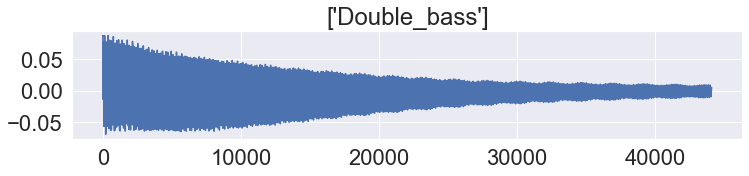

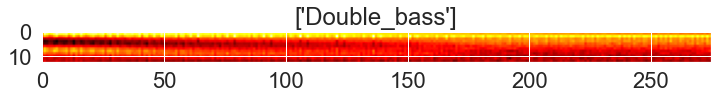

In [109]:
plt.figure(figsize=(12,2))
plt.plot(generated_audio_waves[30])
plt.title(generated_audio_labels[30])
plt.show()
plt.figure(figsize=(12, 2))
plt.imshow(mfcc_features[30].T, cmap='hot')
plt.title(generated_audio_labels[30])
plt.show()

In [343]:
#for i in range(200):
    #if (generated_audio_labels[i]=="") :
       # print(generated_audio_labels[i])
        #print(label_encoded[i])
       # print(one_hot_encoded[i])

In [110]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(generated_audio_labels)
print(label_encoded)

C:\Users\Aheng\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[4 0 4 ... 3 4 4]


In [111]:
label_encoded = label_encoded[:, np.newaxis]
label_encoded

array([[4],
       [0],
       [4],
       ...,
       [3],
       [4],
       [4]])

In [112]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)
one_hot_encoded

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [113]:
X = mfcc_features
y = one_hot_encoded
X = (X-X.min())/(X.max()-X.min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [115]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test.shape)

(4776, 275, 13, 1)
(1194, 275, 13, 1)


In [ ]:
X_test

In [116]:
print(X_train.shape)

(4776, 275, 13, 1)


In [117]:
input_shape

(275, 13, 1)

In [120]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [121]:
y_train.shape

(4776, 5)

In [122]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
150/150 [==============================] - 30s 188ms/step - loss: 1.5871 - acc: 0.2596 - val_loss: 1.1985 - val_acc: 0.4866
Epoch 2/30
150/150 [==============================] - 26s 175ms/step - loss: 1.2749 - acc: 0.4365 - val_loss: 1.0610 - val_acc: 0.5544
Epoch 3/30
150/150 [==============================] - 29s 196ms/step - loss: 1.1852 - acc: 0.4851 - val_loss: 0.9742 - val_acc: 0.6223
Epoch 4/30
150/150 [==============================] - 27s 181ms/step - loss: 1.0740 - acc: 0.5598 - val_loss: 0.8976 - val_acc: 0.6675
Epoch 5/30
150/150 [==============================] - 29s 192ms/step - loss: 1.0196 - acc: 0.5899 - val_loss: 0.7854 - val_acc: 0.7169
Epoch 6/30
150/150 [==============================] - 26s 176ms/step - loss: 0.9314 - acc: 0.6405 - val_loss: 0.7454 - val_acc: 0.7286
Epoch 7/30
150/150 [==============================] - 29s 197ms/step - loss: 0.8768 - acc: 0.6687 - val_loss: 0.6712 - val_acc: 0.7605
Epoch 8/30
150/150 [==============================] - 2

loss: 0.4380721151828766
val_loss: 0.45459693670272827


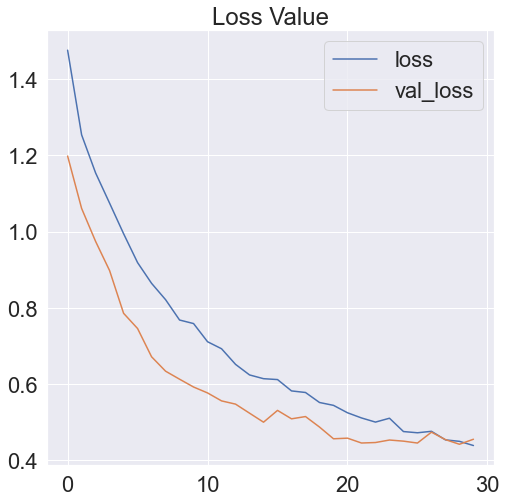

acc: 0.8299832344055176
val_acc: 0.8517587780952454


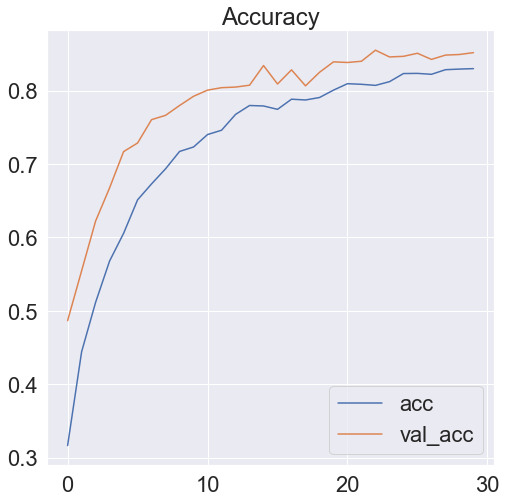

In [123]:
plt.figure(figsize=(8,8))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('loss:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
print('acc:', history.history['acc'][-1])
print('val_acc:', history.history['val_acc'][-1])
plt.show()

In [124]:
preds = model.predict(X_test, verbose=1)

38/38 [==============================] - 1s 31ms/step


In [140]:
labels_dict= {
        0:"Saxophone",1:"Cello",2:"Clarinet",3:"Double_bass",4:"Acoustic_guitar"
}

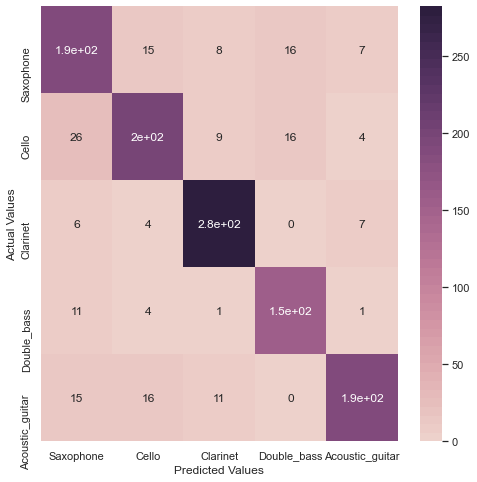

In [141]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(preds, 1))
confusion_df = pd.DataFrame(conf_matrix)

confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
plt.figure(figsize= (8,8))
sns.set(font_scale = 1);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [143]:
confusion_df

,Saxophone,Cello,Clarinet,Double_bass,Acoustic_guitar
Saxophone,190,15,8,16,7
Cello,26,202,9,16,4
Clarinet,6,4,282,0,7
Double_bass,11,4,1,153,1
Acoustic_guitar,15,16,11,0,190


In [358]:
#coba model prediksi
sample=librosa.load("freesound-audio-tagging/COBA/CELLO SOUND.wav")
sample=np.array(sample)

<ipython-input-358-6cc635cd43ed>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sample=np.array(sample)


In [359]:
sample[0]

array([ 0.3117025 ,  0.36581856,  0.1395973 , -0.03446633,  0.64080685,
       -0.4697922 , -1.        ,  0.63694733, -0.40691066, -0.06207186],
      dtype=float32)

In [360]:
bit=len(sample[0])
seconds=bit/sample[1]
hasil=bit-min_bits
print(bit)
print(seconds)
print(hasil)

10
0.00045351473922902497
-44090


In [361]:
chosen=np.random.choice(np.arange(0,hasil))
akhir=mfcc(sample[0][chosen:chosen+min_bits])
akhir.shape

ValueError: 'a' cannot be empty unless no samples are taken

In [351]:
akhir=akhir.reshape(1,akhir.shape[0],akhir.shape[1],1)
akhir.shape

(1, 275, 13, 1)

In [354]:
terakhir = model.predict(akhir, verbose=1)
print(terakhir) 
#['Saxophone']
#[4]
#[0. 0. 0. 0. 1.]

#['Acoustic_guitar']
#[0]
#[1. 0. 0. 0. 0.]

#['Clarinet']
#[2]
#[0. 0. 1. 0. 0.]


#['Double_bass']
#[3]
#[0. 0. 0. 1. 0.]

#[0. 0. 0. 0. 1.]
#['Cello']
#[1]
#[0. 1. 0. 0. 0.]

1/1 [==============================] - 0s 65ms/step
[[0. 0. 1. 0. 0.]]


In [ ]:
#['Saxophone']
#[4]
#[0. 0. 0. 0. 1.]

#['Acoustic_guitar']
#[0]
#[1. 0. 0. 0. 0.]

#['Clarinet']
#[2]
#[0. 0. 1. 0. 0.]


#['Double_bass']
#[3]
#[0. 0. 0. 1. 0.]

#[0. 0. 0. 0. 1.]
#['Cello']
#[1]
#[0. 1. 0. 0. 0.]

In [157]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Initiating an empty neural network
_model = Sequential(name='cnn_1')

# Adding convolutional layer
_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=input_shape))

#model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
# Adding max pooling layer
_model.add(MaxPooling2D(pool_size=(2,4)))

# Adding convolutional layer
_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='relu',padding='same'))

# Adding max pooling layer
_model.add(MaxPooling2D((2,2)))

# Adding a flattened layer to input our image data
_model.add(Flatten())

# Adding a dense layer with 64 neurons
_model.add(Dense(64, activation='relu'))

# Adding a dropout layer for regularization
_model.add(Dropout(0.25))

# Adding an output layer
_model.add(Dense(5, activation='softmax'))

# Compiling our neural network
_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Fitting our neural network
history = _model.fit(X_train,y_train, batch_size=16,validation_data=(X_test, y_test),epochs=30)

Epoch 1/30
299/299 [==============================] - 7s 21ms/step - loss: 1.5711 - accuracy: 0.2477 - val_loss: 1.2682 - val_accuracy: 0.4079
Epoch 2/30
299/299 [==============================] - 6s 20ms/step - loss: 1.2875 - accuracy: 0.3965 - val_loss: 1.2318 - val_accuracy: 0.43802862 - ac
Epoch 3/30
299/299 [==============================] - 6s 20ms/step - loss: 1.2817 - accuracy: 0.4097 - val_loss: 1.2167 - val_accuracy: 0.4095
Epoch 4/30
299/299 [==============================] - 6s 19ms/step - loss: 1.2647 - accuracy: 0.4041 - val_loss: 1.1879 - val_accuracy: 0.4640
Epoch 5/30
299/299 [==============================] - 5s 18ms/step - loss: 1.2355 - accuracy: 0.4335 - val_loss: 1.1727 - val_accuracy: 0.4832
Epoch 6/30
299/299 [==============================] - 5s 18ms/step - loss: 1.2006 - accuracy: 0.4706 - val_loss: 1.1253 - val_accuracy: 0.5134
Epoch 7/30
299/299 [==============================] - 5s 18ms/step - loss: 1.1667 - accuracy: 0.5027 - val_loss: 1.0915 - val_accurac

loss: 0.5850819945335388
val_loss: 0.7043090462684631


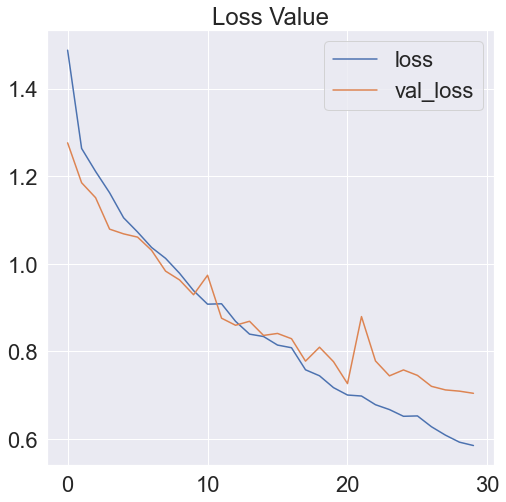

acc: 0.7667503952980042
val_acc: 0.7177554368972778


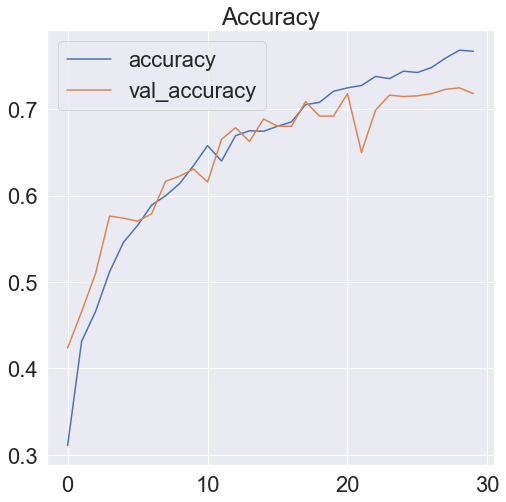

In [119]:
plt.figure(figsize=(8,8))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('loss:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
print('acc:', history.history['accuracy'][-1])
print('val_acc:', history.history['val_accuracy'][-1])
plt.show()

In [46]:
input_shape

(275, 13, 1)

In [61]:
table = pd.read_csv('freesound-audio-tagging/train.csv')

In [62]:
table = table[table['label'].isin(["Saxophone","Cello","Clarinet","Double_bass","Acoustic_guitar"])]

In [63]:
table

,fname,label,manually_verified
1,001ca53d.wav,Saxophone,1
4,00353774.wav,Cello,1
5,003b91e8.wav,Cello,0
8,004ad66f.wav,Clarinet,0
14,0091fc7f.wav,Cello,1
...,...,...,...
9434,ff12dece.wav,Saxophone,1
9442,ff55a1e2.wav,Acoustic_guitar,0
9444,ff752a0c.wav,Clarinet,1
9448,ff875923.wav,Cello,0


In [362]:
import librosa.display
import matplotlib.pyplot as plt
audio_path='freesound-audio-tagging/audio_train/'
table = pd.read_csv('freesound-audio-tagging/train.csv')
a=[]
op=0

labels=[]
for i in range(table.shape[0]): 
    if table['label'][i]=='Cello' or table['label'][i]=='Saxophone' or table['label'][i]=='Double_bass' or table['label'][i]=='Clarinet' or table['label'][i]=='Acoustic_guitar':
        labels.append(table['label'][i])
        y, sr = librosa.core.load(audio_path+table['fname'][i])
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        if spect.shape[1] != 660:
                spect.resize(128,660, refcheck=False)
        a.append(spect)
  


In [363]:
X = np.array(a)

In [364]:
X

array([[[-60.27848  , -56.810555 , -59.754684 , ..., -74.05593  ,
         -69.788185 , -72.84022  ],
        [-71.41301  , -71.00333  , -73.7605   , ..., -44.912067 ,
         -38.328125 , -51.79899  ],
        [-42.594894 , -43.686966 , -43.648697 , ..., -12.684901 ,
         -23.55469  , -32.779396 ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]],

       [[-35.864628 , -39.45858  , -40.867752 , ..., -51.990124 ,
         -52.12964  , -42.878735 ],
        [-48.9694   , -46.424294 , -48.350166 , ..., -57.768955 ,
         -54.76867  , -54.684025 ],
        [-50.115273 , -54.292446 , -61.484123 , ..., -49.071014 ,
         -52.67382  , -50.293934 ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  

In [365]:

labels = pd.Series(labels)
label_dict = {
        "Saxophone":0,"Cello":1,"Clarinet":2,"Double_bass":3,"Acoustic_guitar":4
}
y = labels.map(label_dict).values

In [366]:
y

array([0, 1, 1, ..., 2, 1, 1], dtype=int64)

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [368]:
X_train.min()

-80.0

In [369]:
X_train /= -80
X_test /= -80

In [370]:
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)

In [371]:
y_train

array([1, 2, 0, ..., 0, 4, 3], dtype=int64)

In [372]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [379]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Initiating an empty neural network
cnn_model = Sequential(name='cnn_1')

# Adding convolutional layer
cnn_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(128,660,1)))
# Adding max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,4)))

# Adding convolutional layer
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='relu'))

# Adding max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,4)))

# Adding a flattened layer to input our image data
cnn_model.add(Flatten())

# Adding a dense layer with 64 neurons
cnn_model.add(Dense(64, activation='relu'))

# Adding a dropout layer for regularization
cnn_model.add(Dropout(0.25))

# Adding an output layer
cnn_model.add(Dense(5, activation='softmax'))

# Compiling our neural network
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Fitting our neural network
history = cnn_model.fit(X_train,y_train, batch_size=16,validation_data=(X_test, y_test),epochs=30)

Epoch 1/30
75/75 [==============================] - 27s 328ms/step - loss: 1.5515 - accuracy: 0.3122 - val_loss: 1.3767 - val_accuracy: 0.4267
Epoch 2/30
75/75 [==============================] - 25s 329ms/step - loss: 1.3360 - accuracy: 0.4616 - val_loss: 1.3569 - val_accuracy: 0.4067
Epoch 3/30
75/75 [==============================] - 24s 324ms/step - loss: 1.1820 - accuracy: 0.5256 - val_loss: 1.1815 - val_accuracy: 0.5200
Epoch 4/30
75/75 [==============================] - 24s 319ms/step - loss: 0.9556 - accuracy: 0.6287 - val_loss: 1.1582 - val_accuracy: 0.5467
Epoch 5/30
75/75 [==============================] - 24s 320ms/step - loss: 0.8818 - accuracy: 0.6456 - val_loss: 1.1958 - val_accuracy: 0.5500
Epoch 6/30
75/75 [==============================] - 24s 321ms/step - loss: 0.7729 - accuracy: 0.6981 - val_loss: 1.1543 - val_accuracy: 0.5833
Epoch 7/30
75/75 [==============================] - 25s 328ms/step - loss: 0.6632 - accuracy: 0.7385 - val_loss: 1.2257 - val_accuracy: 0.5733

In [380]:
results = cnn_model.evaluate(X_test, y_test, batch_size=16)

19/19 [==============================] - 2s 83ms/step - loss: 1.8411 - accuracy: 0.6600


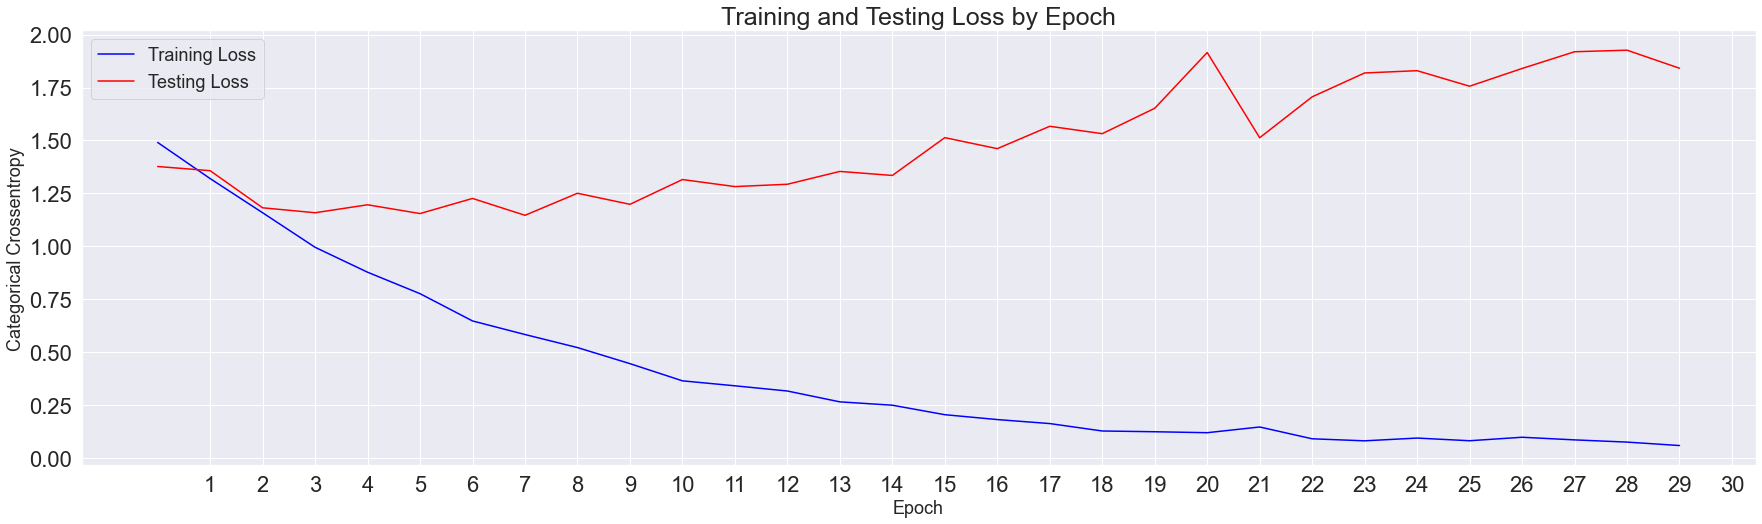

In [381]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(30, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,31), range(1,31))

plt.legend(fontsize = 18);

[0.3708333373069763, 0.4658333361148834, 0.5308333039283752, 0.6000000238418579, 0.6424999833106995, 0.699999988079071, 0.7483333349227905, 0.7758333086967468, 0.809166669845581, 0.8458333611488342, 0.8725000023841858, 0.8799999952316284, 0.8816666603088379, 0.909166693687439, 0.9158333539962769, 0.9300000071525574, 0.9424999952316284, 0.9558333158493042, 0.9574999809265137, 0.9616666436195374, 0.9583333134651184, 0.9466666579246521, 0.9700000286102295, 0.9791666865348816, 0.9725000262260437, 0.9708333611488342, 0.9725000262260437, 0.9775000214576721, 0.9758333563804626, 0.9858333468437195]


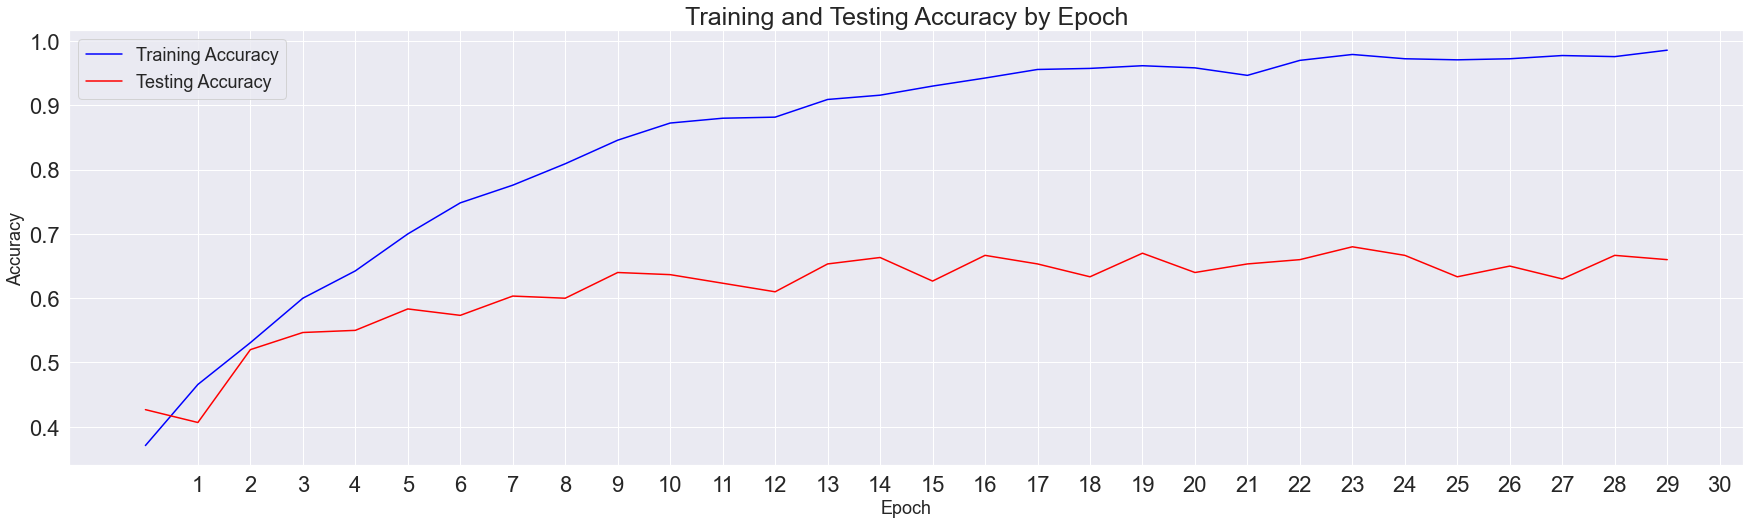

In [382]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train accuracy and test accuracy over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(30, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(test_loss, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,31), range(1,31))

plt.legend(fontsize = 18);

print(train_loss)

In [383]:
labels_dict= {
        "Saxophone":0,"Cello":1,"Clarinet":2,"Double_bass":3,"Acoustic_guitar":4
}
predictions = cnn_model.predict(X_test, verbose=1)

10/10 [==============================] - 2s 154ms/step


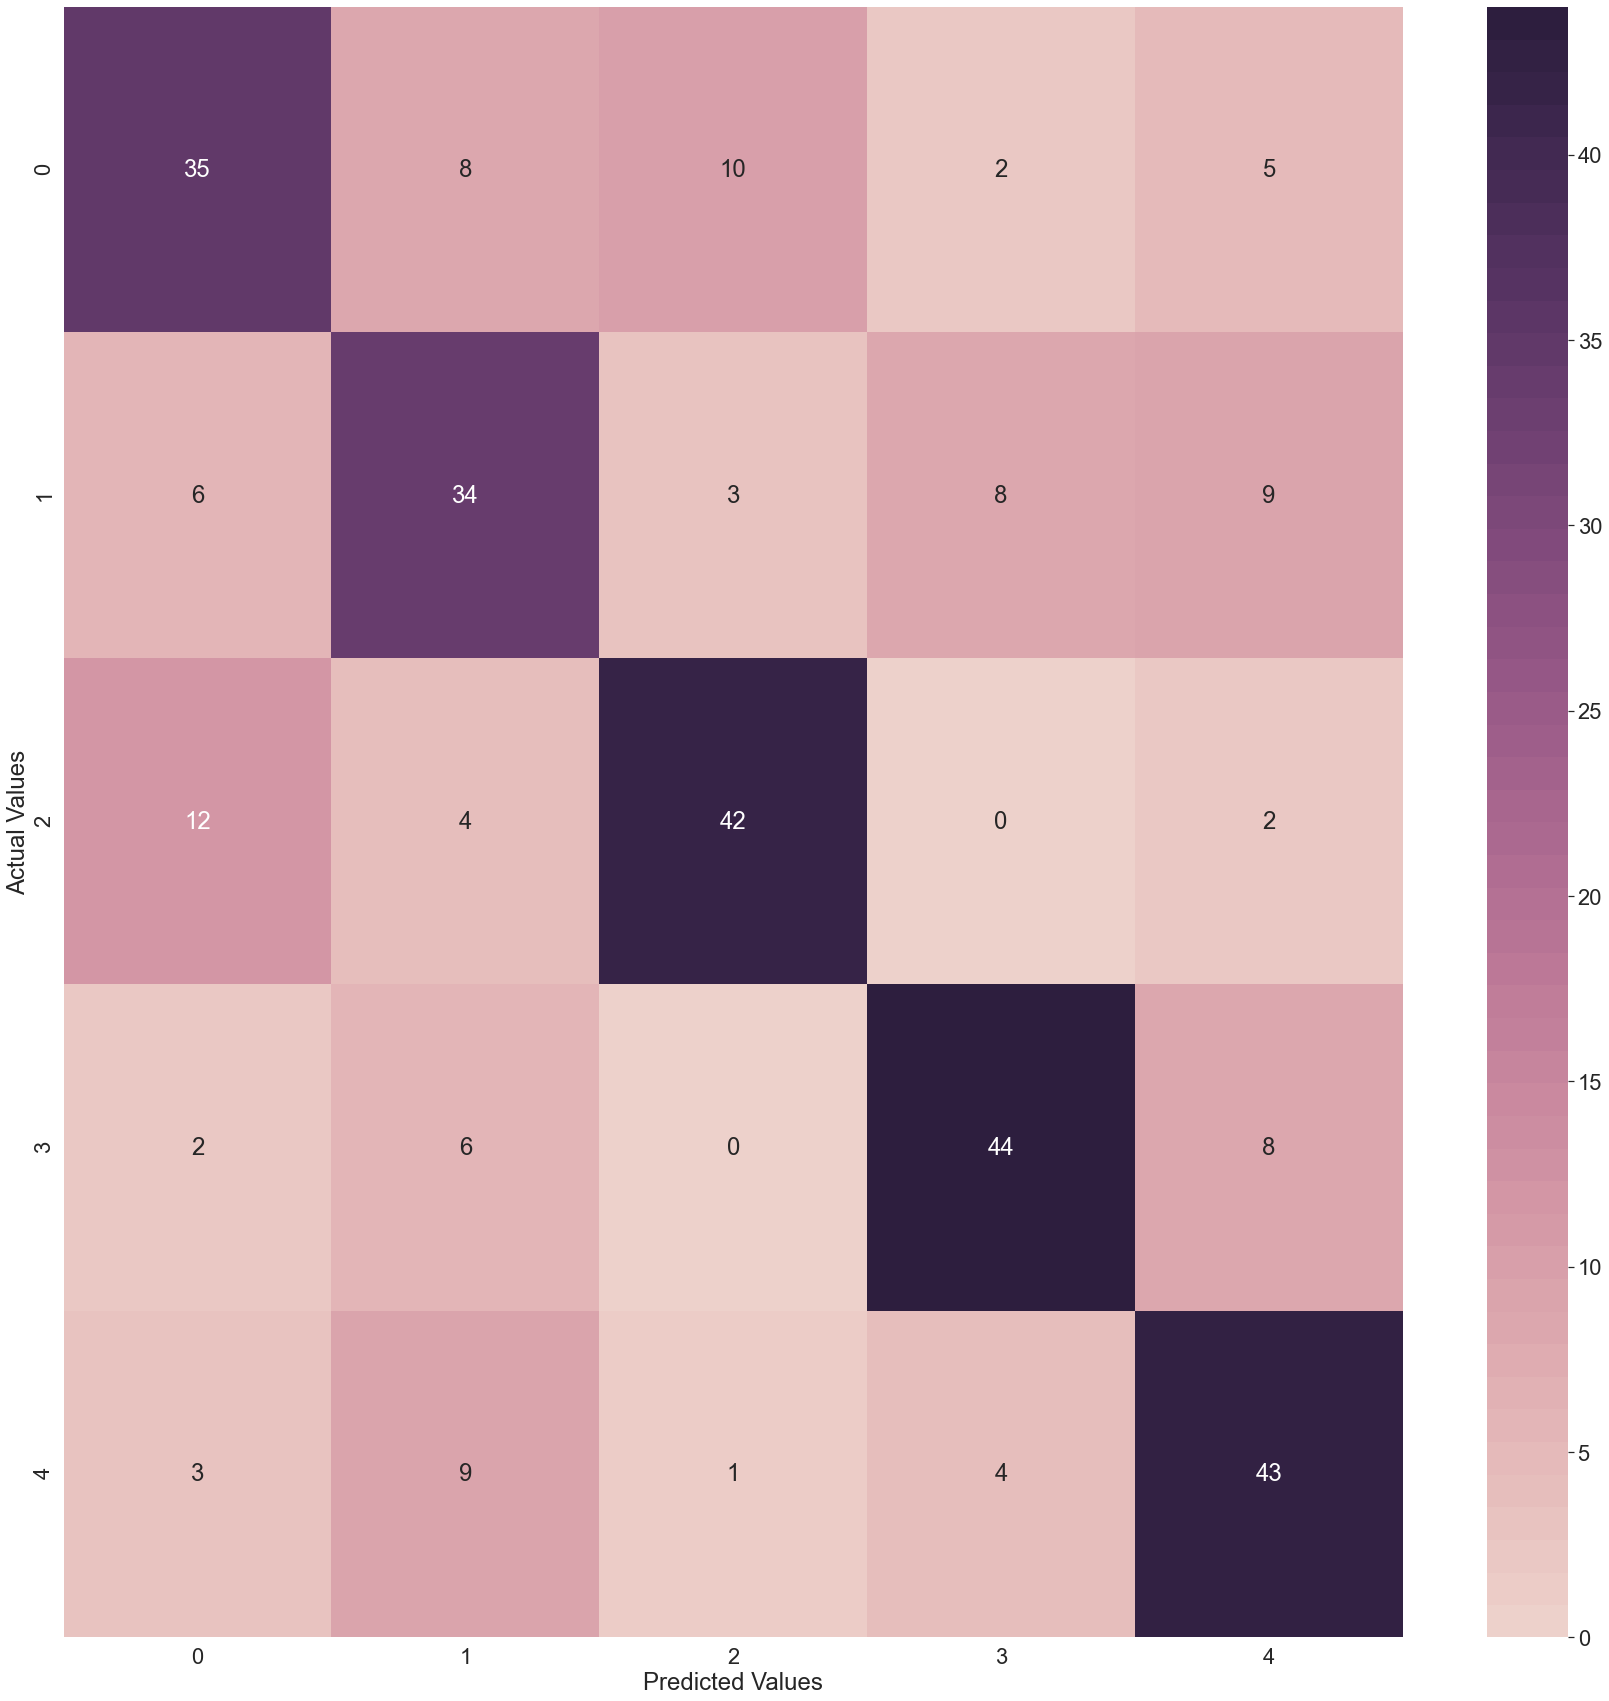

In [384]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
confusion_df = pd.DataFrame(conf_matrix)
confusion_df
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
plt.figure(figsize= (30,30))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [82]:
spec_model = Sequential()
spec_model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=(128,660,1)))
spec_model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
spec_model.add(MaxPool2D((2, 2)))
spec_model.add(Dropout(0.5))
spec_model.add(Flatten())
spec_model.add(Dense(128, activation='relu'))
spec_model.add(Dropout(0.5))
spec_model.add(Dense(64, activation='relu'))
spec_model.add(Dropout(0.5))
spec_model.add(Dense(5, activation='softmax'))

spec_model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [83]:
history = spec_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
38/38 [==============================] - 174s 5s/step - loss: 4.2111 - acc: 0.2358 - val_loss: 1.5360 - val_acc: 0.3500
Epoch 2/30
38/38 [==============================] - 135s 4s/step - loss: 1.5228 - acc: 0.3345 - val_loss: 1.4250 - val_acc: 0.4233
Epoch 3/30
38/38 [==============================] - 137s 4s/step - loss: 1.4053 - acc: 0.4083 - val_loss: 1.2797 - val_acc: 0.4967
Epoch 4/30
38/38 [==============================] - 139s 4s/step - loss: 1.3123 - acc: 0.4859 - val_loss: 1.1361 - val_acc: 0.5467
Epoch 5/30
38/38 [==============================] - 137s 4s/step - loss: 1.0842 - acc: 0.5510 - val_loss: 1.1903 - val_acc: 0.5233
Epoch 6/30
38/38 [==============================] - 131s 3s/step - loss: 1.1671 - acc: 0.5392 - val_loss: 1.0408 - val_acc: 0.5933
Epoch 7/30
38/38 [==============================] - 132s 3s/step - loss: 0.9597 - acc: 0.6434 - val_loss: 1.0111 - val_acc: 0.6367
Epoch 8/30
38/38 [==============================] - 149s 4s/step - loss: 0.9037 - a

In [84]:
results = spec_model.evaluate(X_test, y_test, batch_size=16)

19/19 [==============================] - 6s 324ms/step - loss: 1.6670 - acc: 0.6967


In [85]:
pre = spec_model.predict(X_test, verbose=1)

10/10 [==============================] - 7s 664ms/step


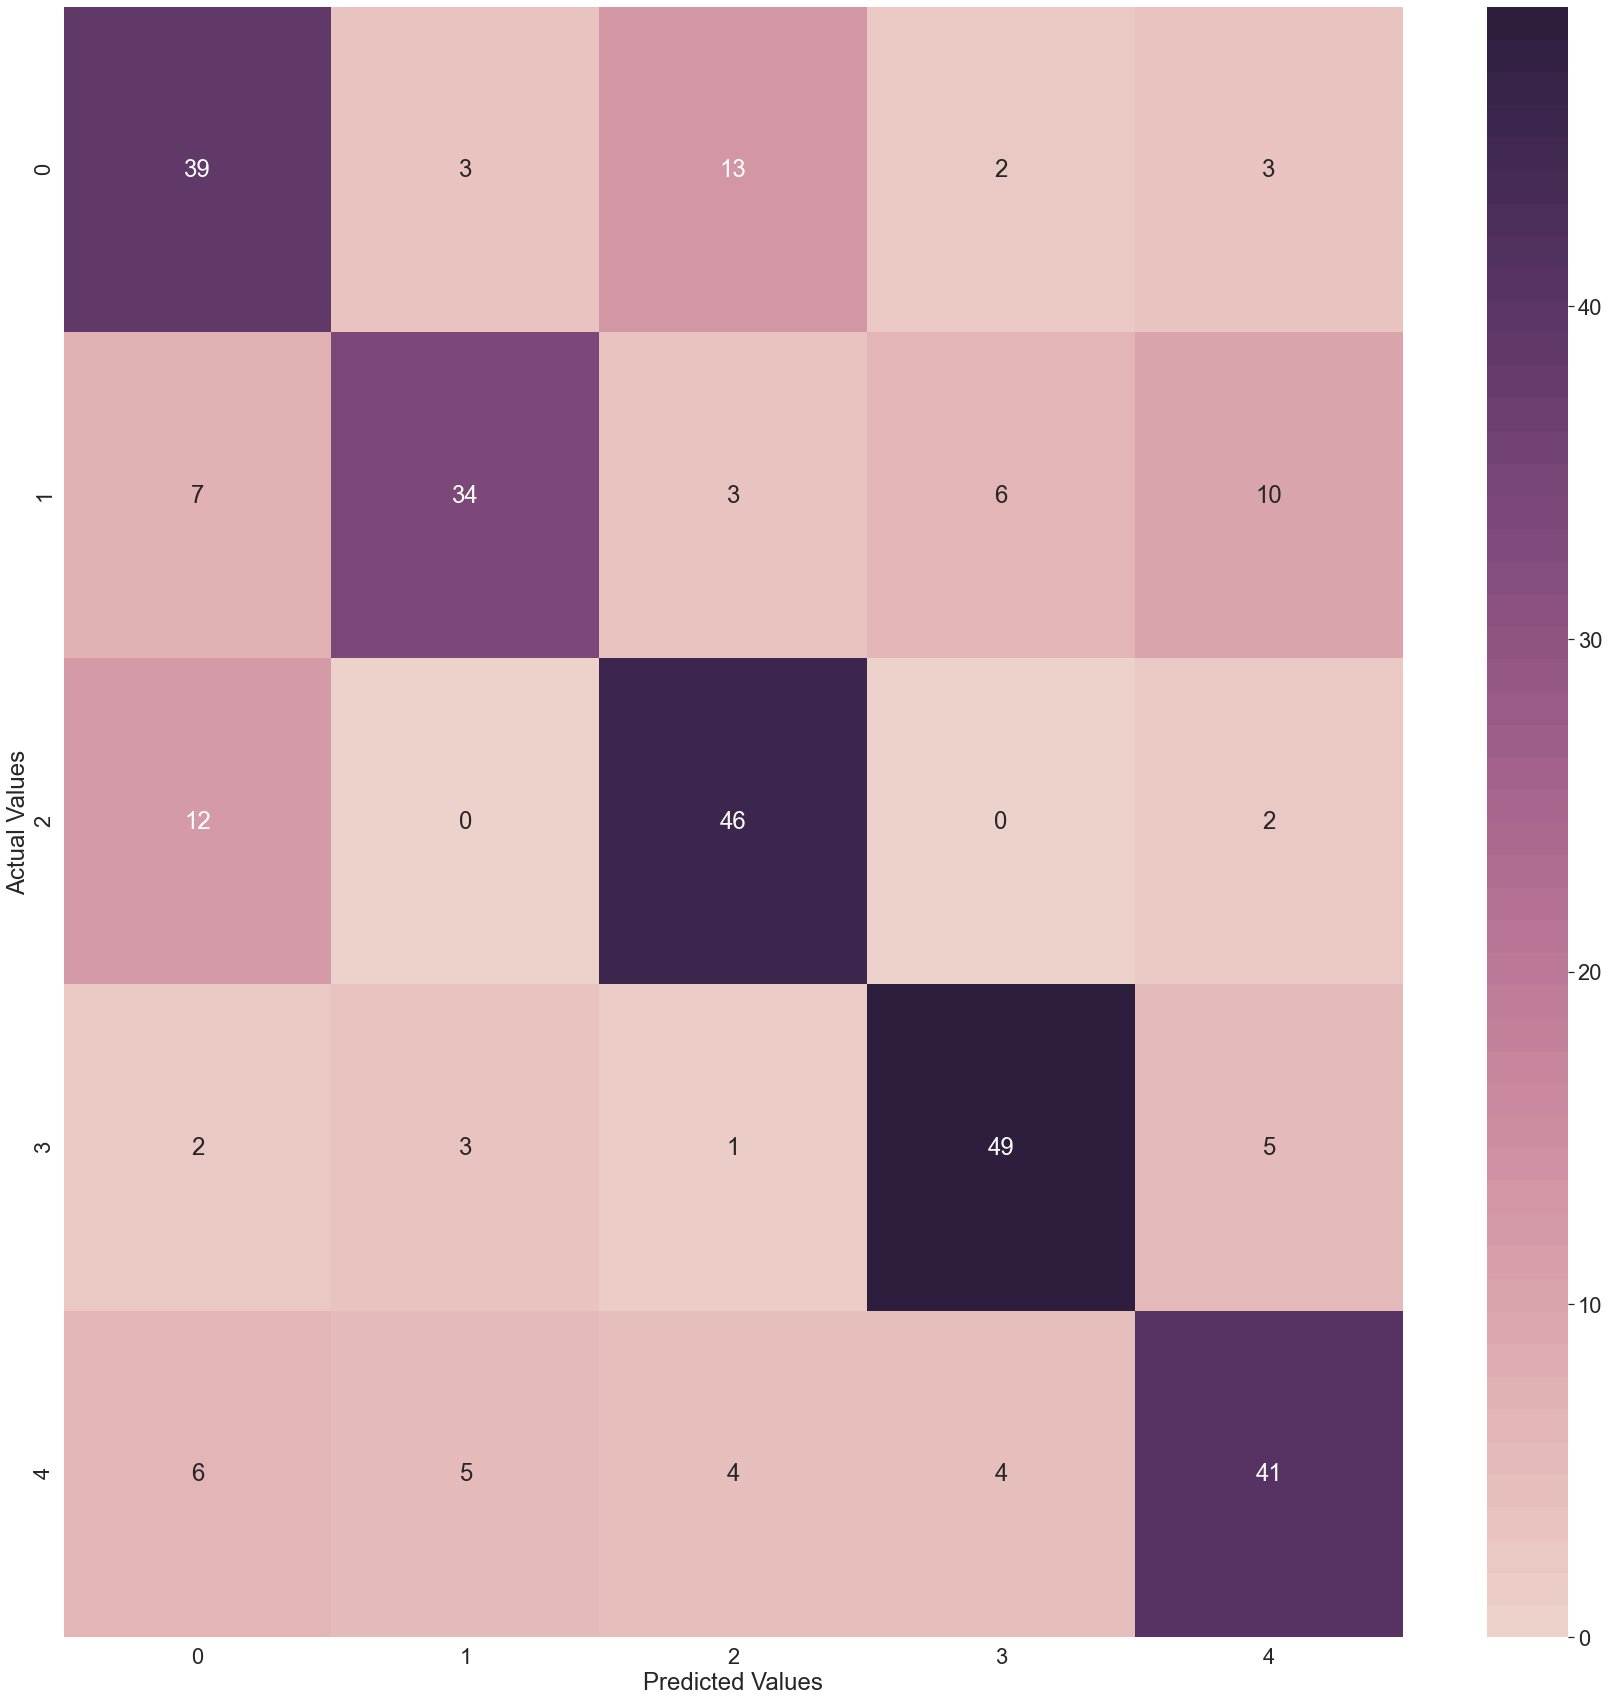

In [86]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(pre, 1))
confusion_df = pd.DataFrame(conf_matrix)
confusion_df
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
plt.figure(figsize= (30,30))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');